# SMS CLASSIFIER

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [3]:
sms = pd.read_csv('spam.csv' ,encoding='latin-1')

In [4]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
sms.shape

(5572, 5)

In [7]:
sms.drop_duplicates(inplace=True)


In [8]:
sms.reset_index(drop=True,inplace=True)

In [9]:
sms.shape

(5169, 5)

In [10]:
sms['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

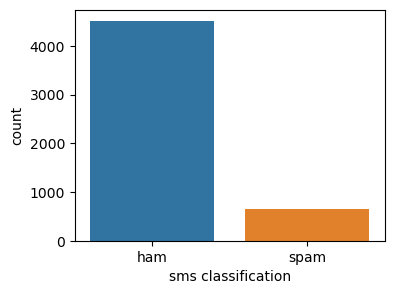

In [11]:
plt.figure(figsize=(4,3))
sns.countplot(x='v1',data=sms)
plt.xlabel('sms classification')
plt.ylabel('count')
plt.show()

In [12]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [36]:
corpus=[]
ps=PorterStemmer()

for i in range(0,sms.shape[0]):
    v2 = re.sub(pattern='[^a-zA-Z]',repl='',string=sms.v2[i])
    v2 = v2.lower()
    words = v2.split()
    words=[word for word in words if word not in set (stopwords.words('english'))]
    words = [ps.stem(word) for word in words]
    v2=''.join(words)
    corpus.append(v2)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [39]:
y=pd.get_dummies(sms['v1'])
y=y.iloc[:,1].values

In [40]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [41]:
from sklearn.model_selection import train_test_split 

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [43]:
best_accuracy = 0.0
alpha_val= 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train,Y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(Y_test,temp_y_pred)
    print("accuracy score for alpha = {}%".format(round(i,1)),round(score*100,2))
    if score>best_accuracy:
        best_accuracy=score
        alpha_val=i
print("______________________________________________________")
print()

C:\Users\sirip\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\sirip\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


accuracy score for alpha = 0.0% 87.62
accuracy score for alpha = 0.1% 87.62
accuracy score for alpha = 0.2% 87.62
accuracy score for alpha = 0.3% 87.62
accuracy score for alpha = 0.4% 87.62
accuracy score for alpha = 0.5% 85.98
accuracy score for alpha = 0.6% 85.98
accuracy score for alpha = 0.7% 85.69
accuracy score for alpha = 0.8% 85.69
accuracy score for alpha = 0.9% 85.69
accuracy score for alpha = 1.0% 85.69
______________________________________________________



In [44]:
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

The best accuracy is 87.62% with alpha value as 0.0


In [45]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, Y_train)

MultinomialNB(alpha=0.1)

In [46]:
y_pred = classifier.predict(X_test)

In [47]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [48]:
acc_s = accuracy_score(Y_test, y_pred)*100
print("Accuracy Score {} %".format(round(acc_s,2)))

Accuracy Score 87.62 %


In [49]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [50]:
result = ['Wait a minute, this is a SPAM!','Ohhh, this is a normal message.']

In [51]:
msg = "Hi! You are pre-qulified for Premium SBI Credit Card. Also get Rs.500 worth Amazon Gift Card*, 10X Rewards Point* & more. Click "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Ohhh, this is a normal message.


In [52]:
msg = "[Update] Congratulations Nile Yogesh, You account is activated for investment in Stocks. Click to invest now: "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Ohhh, this is a normal message.


In [53]:
msg = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"


if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Ohhh, this is a normal message.
